## Observations and Insights 

The number of data points for the all drugs are above 150 which is well above sample size required for statistical significance

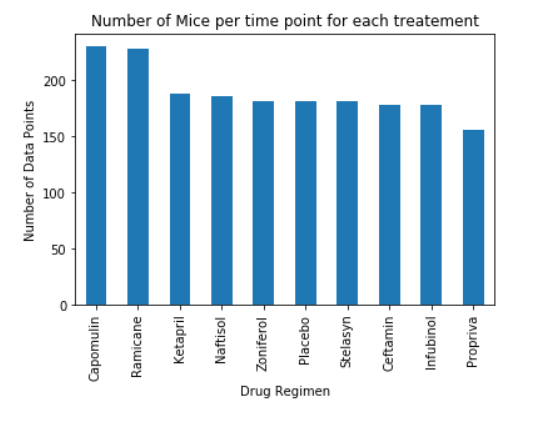

Male and Female population of mice are nearly equal. This will help determine if tumor reduction by any drug has any impact on the sex of the mouse by analyzing the tumor volume per timepoint

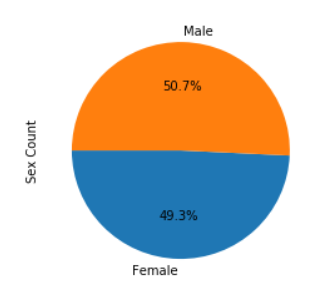

Based the volume at 45th day of the testing Capomulin and Ramicane are the best performing drugs because the reduction in tumor is significant over 45 days trial period.  

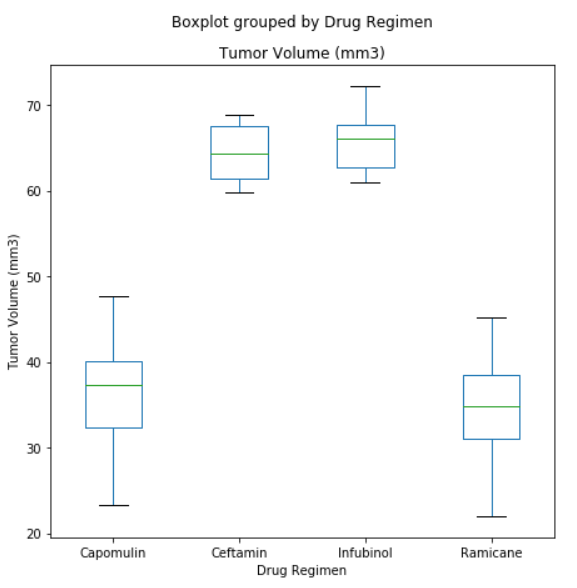

Below line graph is for one mouse treated with Campomulin.  Tumor growth drops significantly after 20days into the trail however nearly after 35days the tumor volume is going up which can be the indication of drug has temporary effect only

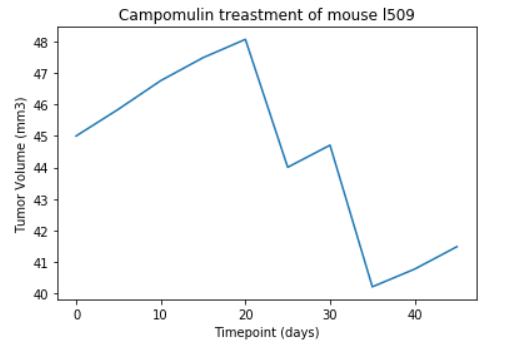

Mouse weight has positive correlation with average tumor volume. therefore looking at the final tumor volume as the success criteria will not be advisable because without controlling the mouse weight could lead wrong interpretation of the drug effectiveness

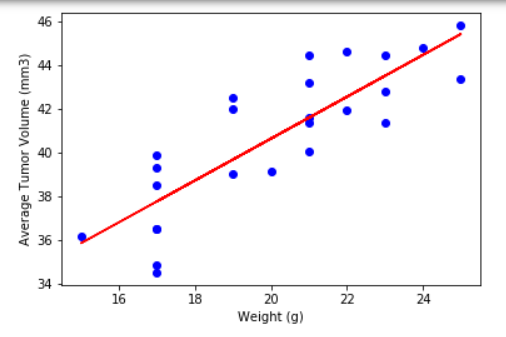

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how = 'outer', on = 'Mouse ID')

mouse_study_df.to_csv (r'C:\Users\njpat\OneDrive\Desktop\MatPlot Work\Pymaceuticals\data\dataframe.csv', index = False, header=True)

mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
#---------------------------------------------------------

# Copying original data frame
mouse_count_df = mouse_study_df.copy()

#Counthing total mice by counthing unique Mouse ID
Total_mouse = len(mouse_count_df["Mouse ID"])

#Creating dataframe with number of mice value
Total_mouse_df = pd.DataFrame([{"Number of Mice": Total_mouse}])

Total_mouse_df.head()

,Number of Mice
0,1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#------------------------------------------------------------------------------------------
Duplicate_MuseID_df = mouse_study_df[mouse_study_df.duplicated(["Mouse ID", "Timepoint"])]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_MuseID_df.set_index("Mouse ID")

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Mouse_StudyClean_df = mouse_study_df.drop_duplicates(["Mouse ID","Timepoint"], keep = "first")
Mouse_StudyClean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.

# Copying original data frame
mouse_countnew_df = Mouse_StudyClean_df.copy()

#Counthing total mice by counthing unique Mouse ID
Total_mouse_new = len(mouse_countnew_df["Mouse ID"])

#Creating dataframe with number of mice value
Total_MouseNew_df = pd.DataFrame([{"Number of Mice": Total_mouse_new}])

Total_MouseNew_df.head()

,Number of Mice
0,1888


## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.

#Defining the Stats_df dataframe
Stats_df = pd.DataFrame(Mouse_StudyClean_df.groupby("Drug Regimen").count())

#Group by Drug then perfrom the statistics function then add the column to the dataframe
Stats_df["mean"] = pd.DataFrame(Mouse_StudyClean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
Stats_df["median"] = pd.DataFrame(Mouse_StudyClean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
Stats_df["std"] = pd.DataFrame(Mouse_StudyClean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
Stats_df["var"] = pd.DataFrame(Mouse_StudyClean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
Stats_df["SEM"] = pd.DataFrame(Mouse_StudyClean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

#modify the dataframe to only show necessary column
Stats_df = Stats_df[["mean", "median", "std", "var", "SEM"]]

Stats_df.head(10)

,mean,median,std,var,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [36]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

#Copy Original DataFarme
Summary_df = Mouse_StudyClean_df.copy()

Summary_df = Summary_df.rename(columns={"Tumor Volume (mm3)" : "Volume"})

#Group by Regimen perfrom calucations using aggration function on Volume
Summary_Data = Summary_df.groupby(["Drug Regimen"]).Volume.agg(["mean", "median", "var", "std", "sem"])

Summary_Data

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

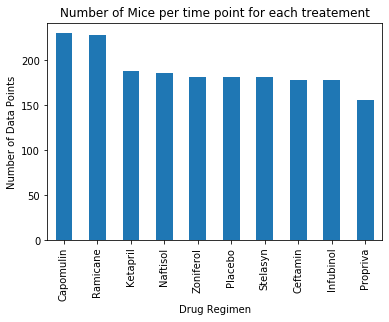

In [17]:
# Generate a bar plot showing the number of mice per time point for each treatment 
# throughout the course of the study using pandas.
#---------------------------------------------------------------------------------------------------
# Copy Original DataFarme
barplot_df = Mouse_StudyClean_df.copy()

# Crated Data Frame with only Drug Regimen and data count per each drug
Count_data = barplot_df.groupby(["Drug Regimen"]).count().sort_values("Mouse ID", ascending = False)
Count_data = Count_data[["Mouse ID"]]
Count_data = Count_data.rename(columns={"Mouse ID" : "Trials"})

# Bar plot for the Number of data points and Drung Regimen
Count_data.plot(kind="bar", legend = False)

#Title and y lable for the bar plot
plt.title("Number of Mice per time point for each treatement")
plt.ylabel("Number of Data Points")

plt.show()

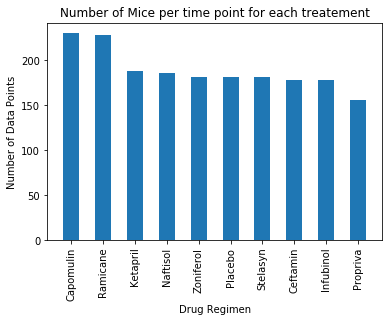

In [18]:
# Generate a bar plot showing the number of mice per time point for each treatment 
# throughout the course of the study using pyplot.

x_axis = np.arange(len(Count_data))
tick_locations = [x for x in x_axis]

plt.title("Number of Mice per time point for each treatement")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")

plt.xlim(-0.75, len(Count_data)-.25)

plt.bar(x_axis, Count_data["Trials"], width = .5)
plt.xticks(tick_locations, Count_data.index.values, rotation="vertical")

plt.show()


## Pie Plots

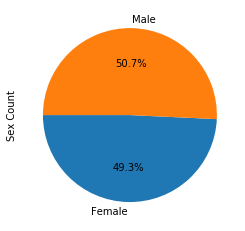

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Copy Clean dataframe
Pie_df = Mouse_StudyClean_df.copy()

#Group by Sex. 
Plot_data = Pie_df.groupby(["Sex"]).count()
Plot_data = Plot_data[["Mouse ID"]]
Plot_data = Plot_data.rename(columns={"Mouse ID" : "Sex Count"})

Plot_data.plot(kind="pie", labels=Plot_data.index.values, autopct="%1.1f%%", 
               startangle=180, subplots=True, legend = False)

plt.show()


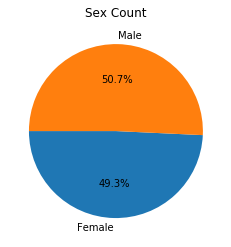

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(Plot_data["Sex Count"], labels=Plot_data.index.values,
        autopct="%1.1f%%", startangle=180)

plt.title("Sex Count")

plt.show()


## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Grab just data for the 4 most promising treatment regimens

#Copy the original dataframe
drug_data_df = Mouse_StudyClean_df.copy()

#final tumor volume of each mouse at time point of 45
drug_data_df = drug_data_df.loc[(drug_data_df["Timepoint"] == 45), :]

#Function to perfrom calculations for each drug
def Cal(drug):
    volume_df = drug_data_df.loc[(drug_data_df["Drug Regimen"] == drug), :]
    Vol = volume_df["Tumor Volume (mm3)"]
    quartiles = Vol.quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)
    iqr = round(upperq-lowerq,2)
    
    print(f'The {drug} drug volume calcuations')
    print(f"The lower quartile of {drug} drug tumor volume is: {lowerq}")
    print(f"The upper quartile of {drug} drug tumor volume is: {upperq}")
    print(f"The interquartile range {drug} drug tumor volume is: {iqr}")
    print(f"The the median of {drug} drug tumor volume is: {round(quartiles[0.5],2)} ")

    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    print('--------------------------------------------------------')

 #-------------------------------------------------------------------------------------
#List of drugs
drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin" ]

#For loop to run the cal funation with each drug listed in above list
for x in drug:
    Cal(x)
    

The Capomulin drug volume calcuations
The lower quartile of Capomulin drug tumor volume is: 32.38
The upper quartile of Capomulin drug tumor volume is: 40.16
The interquartile range Capomulin drug tumor volume is: 7.78
The the median of Capomulin drug tumor volume is: 37.31 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
--------------------------------------------------------
The Ramicane drug volume calcuations
The lower quartile of Ramicane drug tumor volume is: 30.98
The upper quartile of Ramicane drug tumor volume is: 38.51
The interquartile range Ramicane drug tumor volume is: 7.53
The the median of Ramicane drug tumor volume is: 34.85 
Values below 19.69 could be outliers.
Values above 49.8 could be outliers.
--------------------------------------------------------
The Infubinol drug volume calcuations
The lower quartile of Infubinol drug tumor volume is: 62.75
The upper quartile of Infubinol drug tumor volume is: 67.69
The interquartile range Infubi

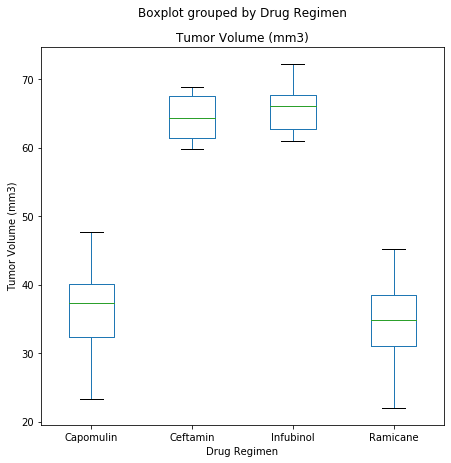

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Volume_df = Mouse_StudyClean_df.loc[(Mouse_StudyClean_df["Drug Regimen"] == "Capomulin") | (Mouse_StudyClean_df["Drug Regimen"] == "Ramicane") | 
                                    (Mouse_StudyClean_df["Drug Regimen"] == "Infubinol") | (Mouse_StudyClean_df["Drug Regimen"] == "Ceftamin") , :]

#final tumor volume of each mouse at time point of 45
Volume_df = Volume_df.loc[(Volume_df["Timepoint"] == 45), :]

#Drug and final tumor volume box plot without gridline 
Volume_df.boxplot(by = "Drug Regimen", column = "Tumor Volume (mm3)", grid = False, figsize = (7,7))

plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

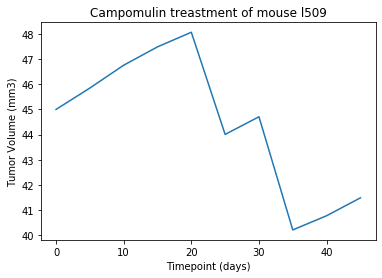

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Copy Clean dataframe
Plots_df = Mouse_StudyClean_df.copy()

PlotCap_df = Plots_df.loc[Plots_df["Drug Regimen"] == "Capomulin"]

PlotCap_df = PlotCap_df.loc[PlotCap_df["Mouse ID"] == "l509"]

plt.plot(PlotCap_df["Timepoint"], PlotCap_df["Tumor Volume (mm3)"])

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Campomulin treastment of mouse l509')

plt.show()

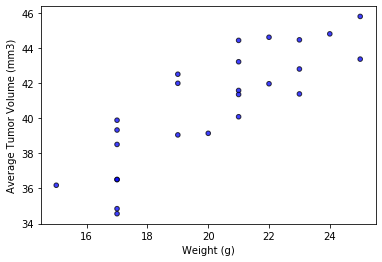

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Creating Dataframe with only Capomulin drug information
Scatter_df = Plots_df.loc[Plots_df["Drug Regimen"] == "Capomulin"]

#groupby Mouse ID
ScatterPlot_df = Scatter_df.groupby(["Mouse ID"])

#Calculate average values 
Mean_df = ScatterPlot_df.mean()

#Scatter plot for Average tumor volume with 
plt.scatter(Mean_df["Weight (g)"], Mean_df["Tumor Volume (mm3)"], marker="o", facecolors="blue", edgecolors="black",
            s=PlotCap_df["Weight (g)"], alpha=0.75)

#Label the axis
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

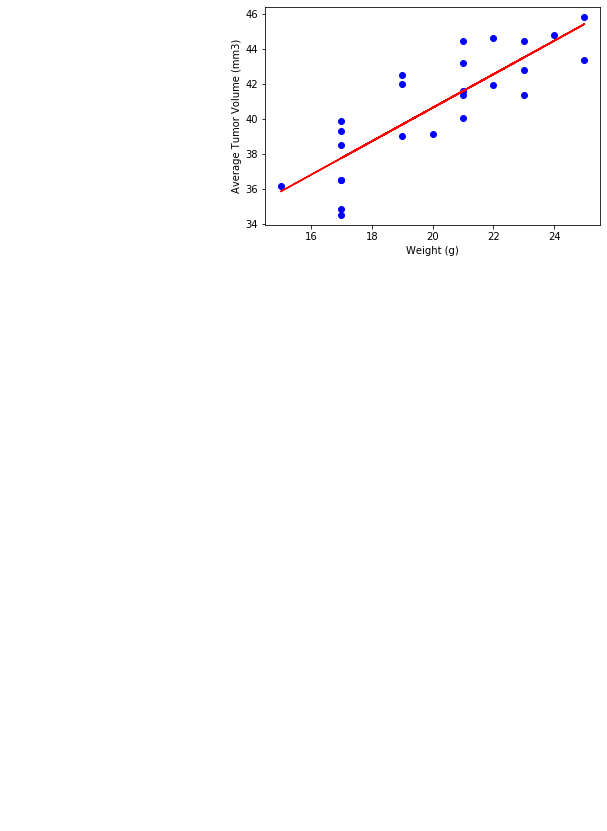

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Add the linear regression equation and line to plot
x_values = Mean_df["Weight (g)"]
y_values = Mean_df["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolor = "blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
